# Current population of Germany by Marital Status

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [20, 18]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                                      # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Population Germany, reference date, marital status.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df.head()

,ReferenceDate,Single,Married,Widowed,Divorced,Registered same-sex partnership,Same-sex partnership dissolved,Same-sex partner deceased,Total
0,1991-12-31,30946691,39011038,6590431,3726404,-,-,-,80274564
1,1992-12-31,31390819,39241802,6564622,3777389,-,-,-,80974632
2,1993-12-31,31677162,39258167,6537510,3865254,-,-,-,81338093
3,1994-12-31,31840613,39222387,6507654,3967949,-,-,-,81538603
4,1995-12-31,32086658,39173015,6478341,4079485,-,-,-,81817499


In [5]:
df.tail()

,ReferenceDate,Single,Married,Widowed,Divorced,Registered same-sex partnership,Same-sex partnership dissolved,Same-sex partner deceased,Total
25,2016-12-31,34663318,35817341,5685734,6207699,128712,15318,3531,82521653
26,2017-12-31,35074789,35680049,5661234,6217800,136953,17419,4107,82792351
27,2018-12-31,35450116,35579183,5637148,6236753,92272,19216,4525,83019213
28,2019-12-31,35791445,35473315,5621393,6280558,-,-,-,83166711
29,2020-12-31,36085603,35165151,5597892,6306385,-,-,-,83155031


In [6]:
df.shape                  

(30, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ReferenceDate                    30 non-null     object
 1   Single                           30 non-null     int64 
 2   Married                          30 non-null     int64 
 3   Widowed                          30 non-null     int64 
 4   Divorced                         30 non-null     int64 
 5   Registered same-sex partnership  30 non-null     object
 6   Same-sex partnership dissolved   30 non-null     object
 7   Same-sex partner deceased        30 non-null     object
 8   Total                            30 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 2.2+ KB


In [8]:
pd.value_counts(df.dtypes)

int64     5
object    4
dtype: int64

In [9]:
df1 = df[['ReferenceDate', 'Single', 'Married', 'Widowed', 'Divorced', 'Total']]
df1.head()

,ReferenceDate,Single,Married,Widowed,Divorced,Total
0,1991-12-31,30946691,39011038,6590431,3726404,80274564
1,1992-12-31,31390819,39241802,6564622,3777389,80974632
2,1993-12-31,31677162,39258167,6537510,3865254,81338093
3,1994-12-31,31840613,39222387,6507654,3967949,81538603
4,1995-12-31,32086658,39173015,6478341,4079485,81817499


In [10]:
df1['ReferenceDate'] = pd.to_datetime(df1['ReferenceDate'])              # convert ReferenceDate series to datetime
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ReferenceDate  30 non-null     datetime64[ns]
 1   Single         30 non-null     int64         
 2   Married        30 non-null     int64         
 3   Widowed        30 non-null     int64         
 4   Divorced       30 non-null     int64         
 5   Total          30 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.5 KB


In [11]:
pd.value_counts(df1.dtypes)                               

int64             5
datetime64[ns]    1
dtype: int64

# Data Transformation

In [12]:
df1['Year'] = df1['ReferenceDate'].dt.year                                # extract year
df1['Month'] = df1['ReferenceDate'].dt.month                              # extract month
df1['Day'] = df1['ReferenceDate'].dt.day                                  # extract day

df1.head()

,ReferenceDate,Single,Married,Widowed,Divorced,Total,Year,Month,Day
0,1991-12-31,30946691,39011038,6590431,3726404,80274564,1991,12,31
1,1992-12-31,31390819,39241802,6564622,3777389,80974632,1992,12,31
2,1993-12-31,31677162,39258167,6537510,3865254,81338093,1993,12,31
3,1994-12-31,31840613,39222387,6507654,3967949,81538603,1994,12,31
4,1995-12-31,32086658,39173015,6478341,4079485,81817499,1995,12,31


In [13]:
df1['SinglePctChg'] = df1['Single'].pct_change()                          # calculate percentage change for singles   
df1['MarriedPctChg'] = df1['Married'].pct_change()                        # calculate percentage change for married
df1['WidowedPctChg'] = df1['Widowed'].pct_change()                        # calculate percentage change for widowed
df1['DivorcedPctChg'] = df1['Divorced'].pct_change()                      # calculate percentage change for divorced
df1['OverallPctChg'] = df1['Total'].pct_change()                          # calculate overall percentage change

df1.head()

,ReferenceDate,Single,Married,Widowed,Divorced,Total,Year,Month,Day,SinglePctChg,MarriedPctChg,WidowedPctChg,DivorcedPctChg,OverallPctChg
0,1991-12-31,30946691,39011038,6590431,3726404,80274564,1991,12,31,NaN,NaN,NaN,NaN,NaN
1,1992-12-31,31390819,39241802,6564622,3777389,80974632,1992,12,31,0.014351,0.005915,-0.003916,0.013682,0.008721
2,1993-12-31,31677162,39258167,6537510,3865254,81338093,1993,12,31,0.009122,0.000417,-0.004130,0.023261,0.004489
3,1994-12-31,31840613,39222387,6507654,3967949,81538603,1994,12,31,0.005160,-0.000911,-0.004567,0.026569,0.002465
4,1995-12-31,32086658,39173015,6478341,4079485,81817499,1995,12,31,0.007727,-0.001259,-0.004504,0.028109,0.003420


In [14]:
df2 = df1.iloc[:, [0, 6, 7, 8, 1, 9, 2, 10, 3, 11, 4, 12, 5, 13]]          # change the column order 
df2.head()

,ReferenceDate,Year,Month,Day,Single,SinglePctChg,Married,MarriedPctChg,Widowed,WidowedPctChg,Divorced,DivorcedPctChg,Total,OverallPctChg
0,1991-12-31,1991,12,31,30946691,NaN,39011038,NaN,6590431,NaN,3726404,NaN,80274564,NaN
1,1992-12-31,1992,12,31,31390819,0.014351,39241802,0.005915,6564622,-0.003916,3777389,0.013682,80974632,0.008721
2,1993-12-31,1993,12,31,31677162,0.009122,39258167,0.000417,6537510,-0.004130,3865254,0.023261,81338093,0.004489
3,1994-12-31,1994,12,31,31840613,0.005160,39222387,-0.000911,6507654,-0.004567,3967949,0.026569,81538603,0.002465
4,1995-12-31,1995,12,31,32086658,0.007727,39173015,-0.001259,6478341,-0.004504,4079485,0.028109,81817499,0.003420


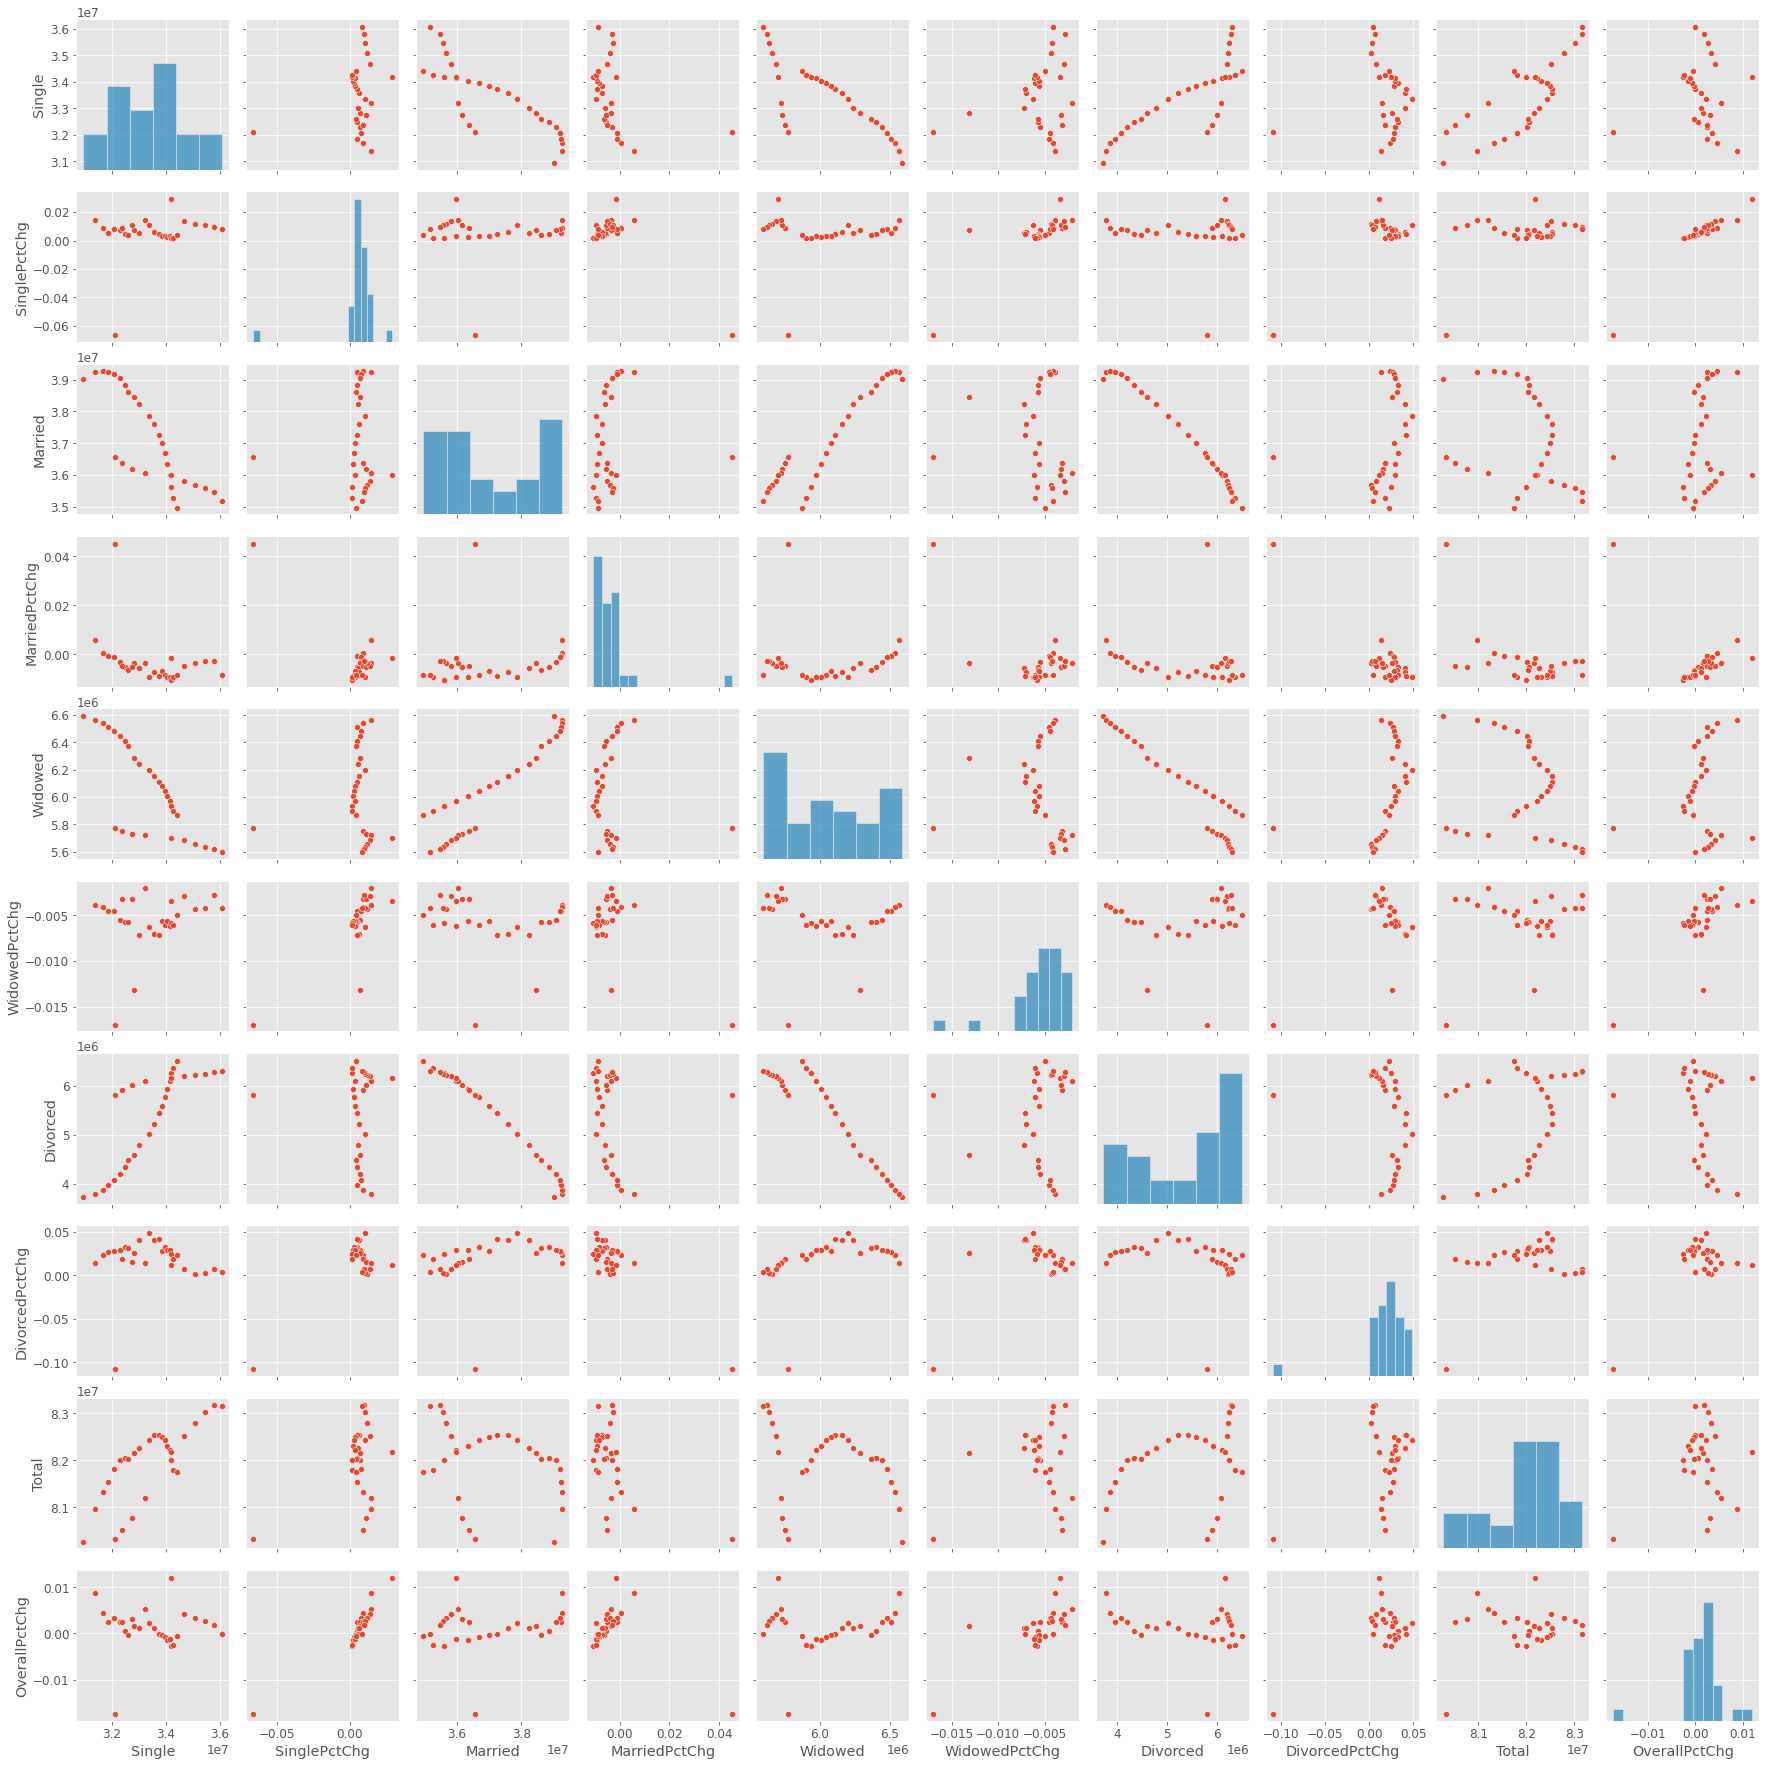

In [15]:
sns.pairplot(df2.drop(columns=['ReferenceDate',	'Year',	'Month',	'Day']))

# Missing Values Exploration

In [16]:
df2.isna().sum()

ReferenceDate     0
Year              0
Month             0
Day               0
Single            0
SinglePctChg      1
Married           0
MarriedPctChg     1
Widowed           0
WidowedPctChg     1
Divorced          0
DivorcedPctChg    1
Total             0
OverallPctChg     1
dtype: int64

<AxesSubplot:>

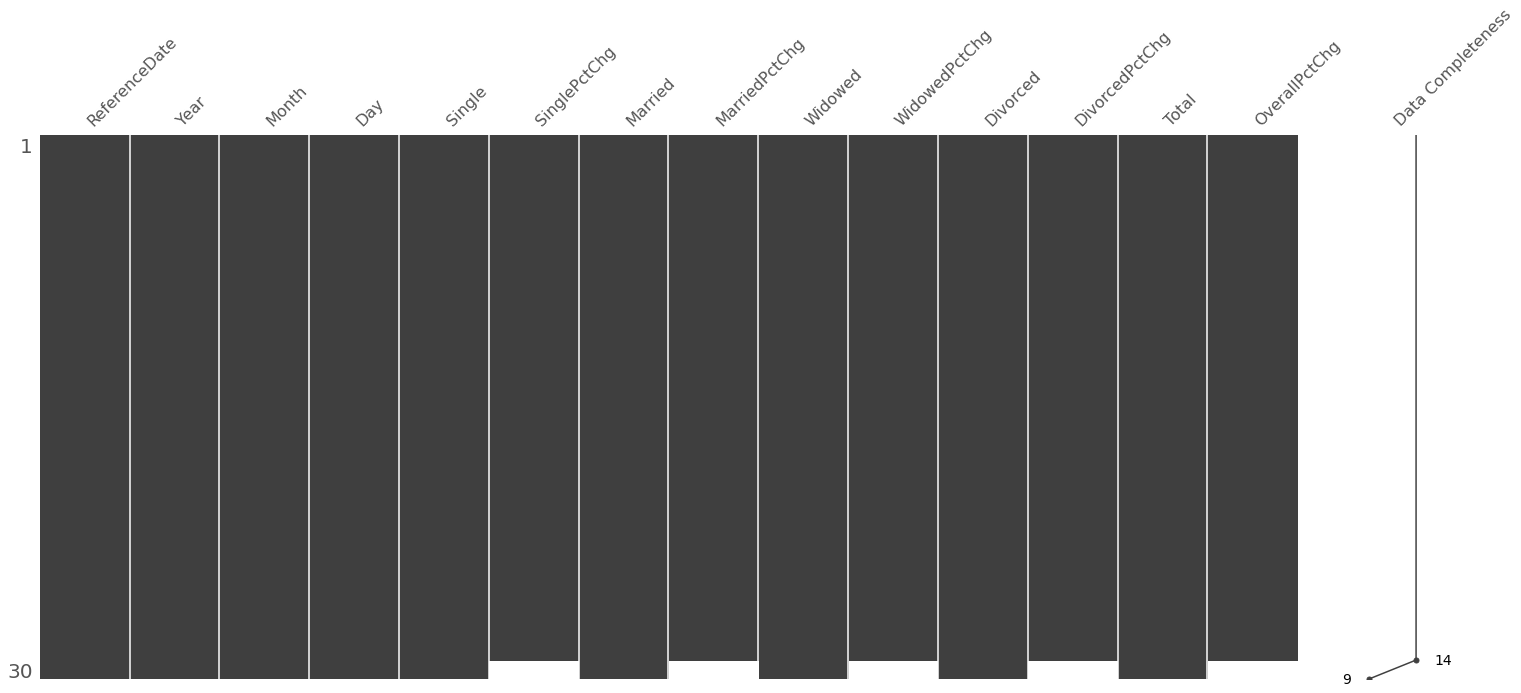

In [17]:
msno.matrix(df2, labels=True, sort='descending')

# Data Visualization

In [18]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter
def million(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)

# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter
def percentage(x, pos):
    'The two args are the value and tick position'
    return '%1.3f%%' % (x * 1)

format_pct = FuncFormatter(percentage)

# Current population of Germany by Marital Status Exploration

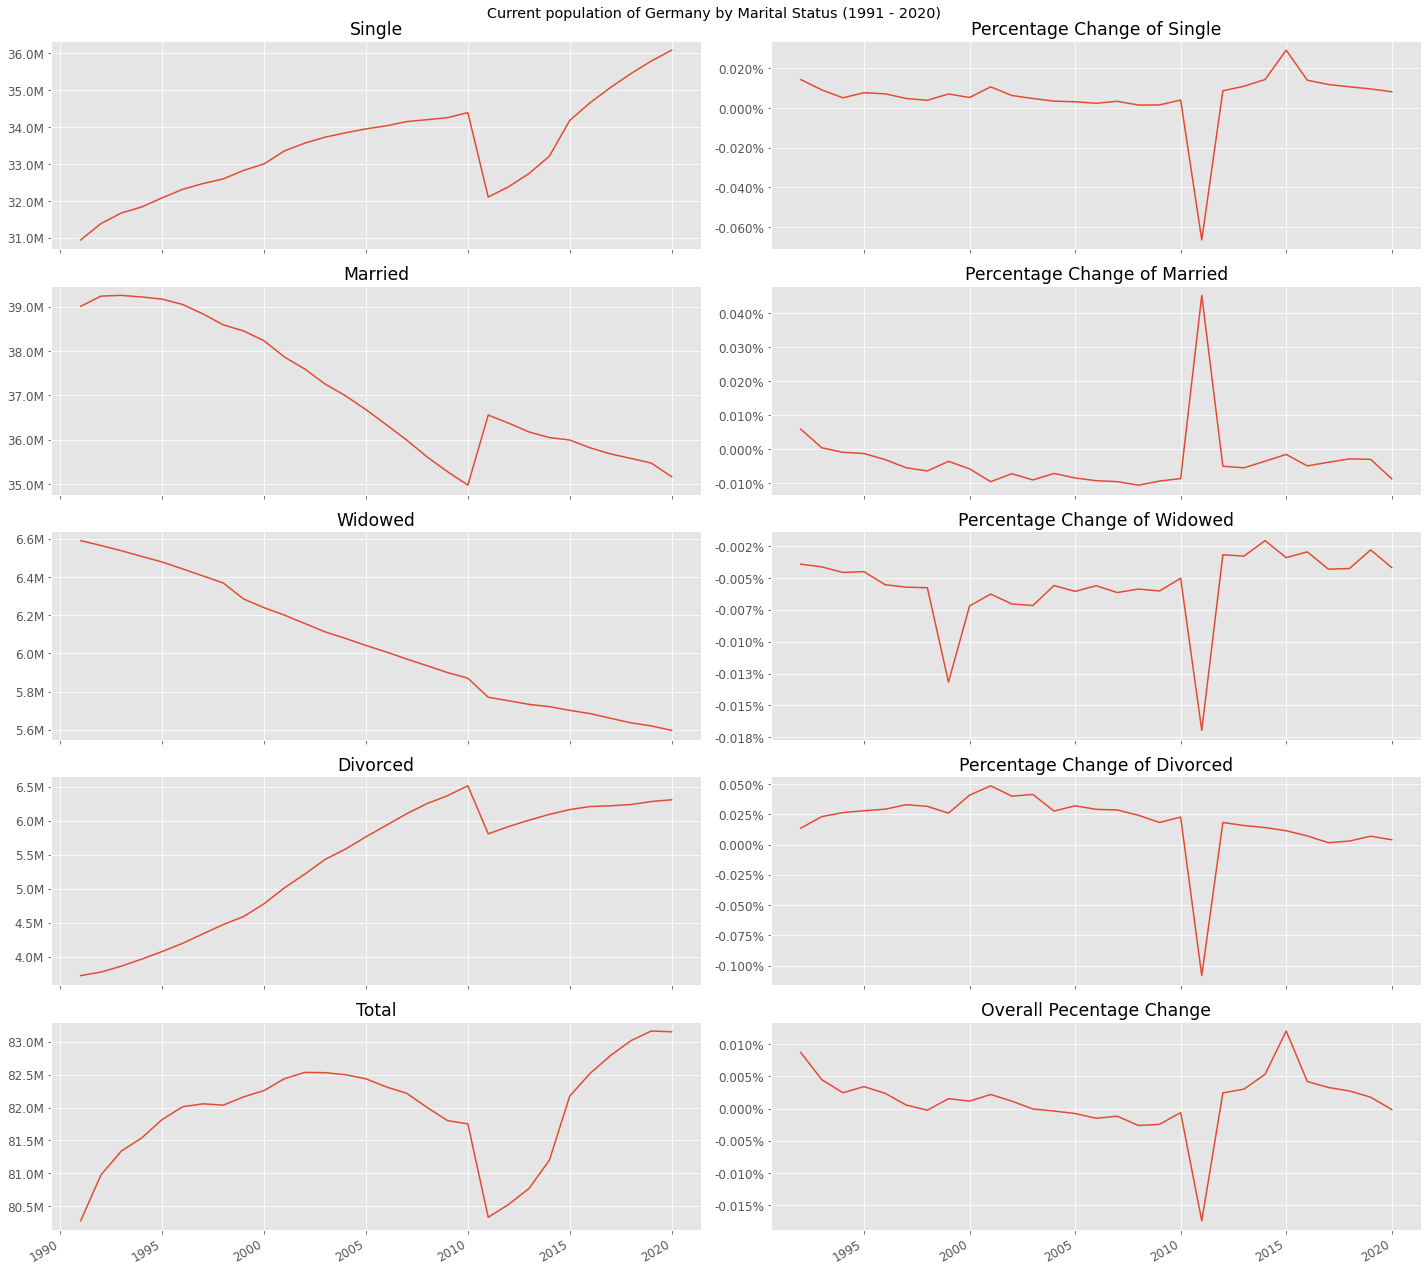

In [19]:
# create figure and axis
fig, axs = plt.subplots(5, 2)
fig.suptitle('Current population of Germany by Marital Status (1991 - 2020)')
fig.autofmt_xdate()

# plot single and percentage change of single
axs[0, 0].plot(df2['Year'], df2['Single'])
axs[0, 0].set(title='Single')

axs[0, 1].plot(df2['Year'], df2['SinglePctChg'])
axs[0, 1].set(title='Percentage Change of Single')

# plot married and percentage change of married
axs[1, 0].plot(df2['Year'], df2['Married'])
axs[1, 0].set(title='Married')

axs[1, 1].plot(df2['Year'], df2['MarriedPctChg'])
axs[1, 1].set(title='Percentage Change of Married')

# plot widowed and percentage change of windowed
axs[2, 0].plot(df2['Year'], df2['Widowed'])
axs[2, 0].set(title='Widowed')

axs[2, 1].plot(df2['Year'], df2['WidowedPctChg'])
axs[2, 1].set(title='Percentage Change of Widowed')

# plot divorced and percentage change of divorced
axs[3, 0].plot(df2['Year'], df2['Divorced'])
axs[3, 0].set(title='Divorced')

axs[3, 1].plot(df1['Year'], df1['DivorcedPctChg'])
axs[3, 1].set(title='Percentage Change of Divorced')

# plot total and overall percentage change
axs[4, 0].plot(df2['Year'], df2['Total'])
axs[4, 0].set(title='Total')

axs[4, 1].plot(df1['Year'], df1['OverallPctChg'])
axs[4, 1].set(title='Overall Pecentage Change')

for ax1 in axs[0, 0], axs[1, 0], axs[2, 0], axs[3, 0], axs[4, 0]:
  for ax2 in axs[0, 1], axs[1, 1], axs[2, 1], axs[3, 1], axs[4, 1]:
    ax1.yaxis.set_major_formatter(formatter=format_mill)
    ax2.yaxis.set_major_formatter(formatter=format_pct)